In [1]:
## Junior Data Scientist – Trader Behavior Insights

In [2]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All library imported')

All library imported


In [3]:
# load the Historical dataset
hisdata=pd.read_csv('Downloads/crypto project/historical_data.csv')
print('Data imported')

Data imported


In [4]:
# load the Market Sentiment dataset
fgdata=pd.read_csv('Downloads/crypto project/fear_greed_index.csv')
print('Data imported')

Data imported


In [5]:
hisdata.info() # inspect the Historicaldata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
hisdata.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
hisdata.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [8]:
fgdata.info()  # inspect the Sentiment data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
fgdata.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
fgdata.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [11]:
# data missing values
hisdata.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [12]:
fgdata.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [13]:
fgdata['classification'].value_counts() #values in classification

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [14]:
fgdata['date'] = pd.to_datetime(fgdata['date']) #convert the date to proper datetime format 
print(fgdata.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB
None


In [15]:
sentiment_mapping = {'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4}
fgdata['sentiment_score'] = fgdata['classification'].map(sentiment_mapping) #converting categorical data to numerical
fgdata.drop('classification', axis=1, inplace=True)
print(fgdata.head())

    timestamp  value       date  sentiment_score
0  1517463000     30 2018-02-01                1
1  1517549400     15 2018-02-02                0
2  1517635800     40 2018-02-03                1
3  1517722200     24 2018-02-04                0
4  1517808600     11 2018-02-05                0


In [16]:
fgdata.set_index('date', inplace=True) #setting date to index 
print(fgdata.head())

             timestamp  value  sentiment_score
date                                          
2018-02-01  1517463000     30                1
2018-02-02  1517549400     15                0
2018-02-03  1517635800     40                1
2018-02-04  1517722200     24                0
2018-02-05  1517808600     11                0


In [17]:
fgdata.isnull().sum()

timestamp          0
value              0
sentiment_score    0
dtype: int64

In [18]:
hisdata['time'] = pd.to_datetime(hisdata['Timestamp IST'], format='%d-%m-%Y %H:%M') # The 'Timestamp IST' column has  the date and time so let's convert it to datetime objects.
hisdata.drop('Timestamp IST', axis=1, inplace=True) # Remove the original timestamp column
hisdata.head()
hisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  Time

In [19]:
cols_to_numeric = ['Execution Price','Size Tokens', 'Size USD','Start Position', 'Closed PnL', 'Order ID', 'Fee', 'Trade ID', 'Timestamp'] #Datatype conversion of numercial columns
for col in cols_to_numeric:
    hisdata[col] = pd.to_numeric(hisdata[col], errors='coerce') 
print(hisdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  Time

In [20]:
hisdata.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
time                0
dtype: int64

##### The sentiment data has 'date' column, and the historical data has a 'time' column with timestamps. To merge them, we'll need to extract the date part from the 'time' column in historical data

In [22]:
hisdata['trade_date'] = hisdata['time'].dt.date
hisdata['trade_date'] = pd.to_datetime(hisdata['trade_date']) 
print(hisdata[['time', 'trade_date']].head())

                 time trade_date
0 2024-12-02 22:50:00 2024-12-02
1 2024-12-02 22:50:00 2024-12-02
2 2024-12-02 22:50:00 2024-12-02
3 2024-12-02 22:50:00 2024-12-02
4 2024-12-02 22:50:00 2024-12-02


In [23]:
merged_df = pd.merge(hisdata, fgdata['sentiment_score'], left_on='trade_date', right_index=True, how='left')
print(merged_df.head())
print(merged_df.info())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side  Start Position Direction  Closed PnL  \
0       986.87   7872.16  BUY        0.000000       Buy         0.0   
1        16.00    127.68  BUY      986.524596       Buy         0.0   
2       144.09   1150.63  BUY     1002.518996       Buy         0.0   
3       142.98   1142.04  BUY     1146.558564       Buy         0.0   
4         8.73     69.75  BUY     1289.488521       Buy         0.0   

                                    Transaction Hash     Order ID  Crossed  \
0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706

In [24]:
#some values  in sentimental score are missing, mwe should either fillna() or drop rows since numbers are less

In [25]:
print("\nAverage PnL by Sentiment:") # Average PnL by Sentiment
print(merged_df.groupby('sentiment_score')['Closed PnL'].mean())


Average PnL by Sentiment:
sentiment_score
0.0    34.537862
1.0    54.290400
2.0    34.307718
3.0    42.743559
4.0    67.892861
Name: Closed PnL, dtype: float64


The average 'Closed PnL' appears to be higher during periods of higher sentiment (Greed and Extreme Greed) compared to periods of Fear or Neutral sentiment. The highest average PnL is observed during Extreme Greed (sentiment score 4.0), and the lowest is during Neutral sentiment (score 2.0), although Fear (score 0.0) is quite close to Neutral. Win Rate by Sentiment:

In [27]:
print("\nWin Rate by Sentiment:")  # Win Rate by Sentiment
profitable_trades = merged_df[merged_df['Closed PnL'] > 0].groupby('sentiment_score').size().reset_index(name='profitable_count')
total_trades = merged_df.groupby('sentiment_score').size().reset_index(name='total_count')
win_rate_by_sentiment = pd.merge(profitable_trades, total_trades, on='sentiment_score')
win_rate_by_sentiment['win_rate'] = win_rate_by_sentiment['profitable_count'] / win_rate_by_sentiment['total_count']
print(win_rate_by_sentiment)



Win Rate by Sentiment:
   sentiment_score  profitable_count  total_count  win_rate
0              0.0              7931        21400  0.370607
1              1.0             26019        61837  0.420768
2              2.0             14961        37686  0.396991
3              3.0             19358        50303  0.384828
4              4.0             18594        39992  0.464943


The win rate (percentage of profitable trades) also seems to be generally higher during periods of higher sentiment. The highest win rate is observed during Extreme Greed (sentiment score 4.0), at approximately 46.5%. The lowest win rate is during Extreme Fear (sentiment score 0.0), at around 37.1%. Box Plot (which you should be seeing now


Distribution of PnL by Sentiment (Box Plots):


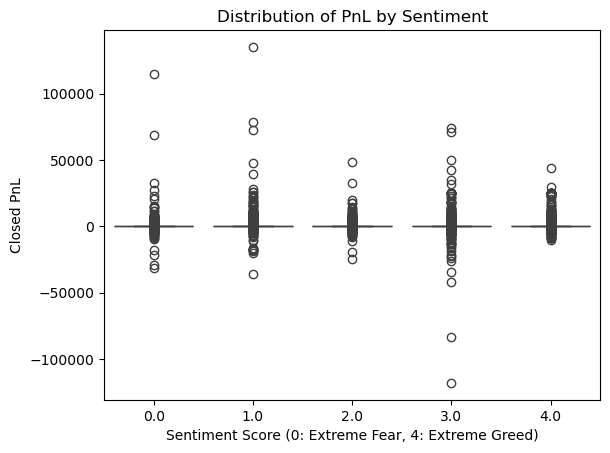

In [29]:
print("\nDistribution of PnL by Sentiment (Box Plots):") # Distribution of PnL by Sentiment using Boxplots
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='sentiment_score', y='Closed PnL', data=merged_df)
plt.title('Distribution of PnL by Sentiment')
plt.xlabel('Sentiment Score (0: Extreme Fear, 4: Extreme Greed)')
plt.ylabel('Closed PnL')
plt.show()

The box plot will visually show the distribution of 'Closed PnL' for each sentiment category. You'll likely observe differences in the median PnL, the spread (interquartile range), and the presence of outliers across the sentiment scores. This can give you a better understanding of the risk and reward profiles associated with trading during different sentiment regime

Trading Strategies: These findings could suggest anything about the effectiveness of different trading strategies under varying sentiment, For example, are certain types of trades (e.g., buying vs. selling) more profitable in specific sentiment conditions

Here's how we can investigate this:

1. Group by Sentiment and Trade Side:

We'll group the merged_df by both sentiment_score and the Side of the trade.

2. Analyze Profitability Metrics:

For each combination of sentiment and trade side, we can calculate:

Average PnL: To see if buying or selling is more profitable under different sentiment.
Win Rate: To see if the success rate of buying or selling differs with sentiment.


Average PnL by Sentiment and Trade Side:
Side                   BUY        SELL
sentiment_score                       
0.0              34.114627   34.980106
1.0              63.927104   45.049641
2.0              29.227429   39.456408
3.0              25.002302   59.691091
4.0              10.498927  114.584643

Win Rate by Sentiment and Trade Side (%):
Side                   BUY       SELL
sentiment_score                      
0.0              20.164609  54.715719
1.0              26.299967  57.205309
2.0              24.002320  55.607202
3.0              31.807454  44.859486
4.0              31.142698  58.983312


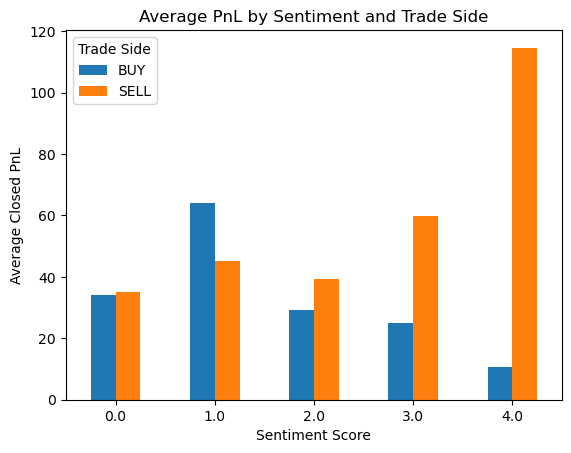

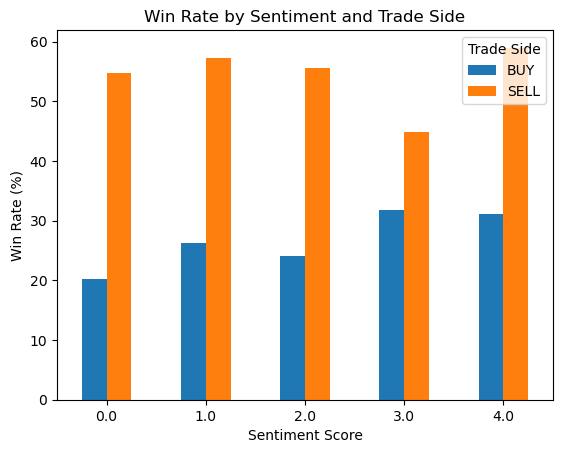

In [34]:
# Average PnL by Sentiment and Trade Side
average_pnl_by_sentiment_side = merged_df.groupby(['sentiment_score', 'Side'])['Closed PnL'].mean().unstack()
print("\nAverage PnL by Sentiment and Trade Side:")
print(average_pnl_by_sentiment_side)

# Win Rate by Sentiment and Trade Side
profitable_trades_side = merged_df[merged_df['Closed PnL'] > 0].groupby(['sentiment_score', 'Side']).size().unstack(fill_value=0)
total_trades_side = merged_df.groupby(['sentiment_score', 'Side']).size().unstack(fill_value=0)

win_rate_by_sentiment_side = (profitable_trades_side / total_trades_side) * 100
print("\nWin Rate by Sentiment and Trade Side (%):")
print(win_rate_by_sentiment_side)

# Visualize Average PnL by Sentiment and Side
import matplotlib.pyplot as plt
import seaborn as sns

average_pnl_by_sentiment_side.plot(kind='bar', stacked=False)
plt.title('Average PnL by Sentiment and Trade Side')
plt.xlabel('Sentiment Score')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=0)
plt.legend(title='Trade Side')
plt.show()

# Visualize Win Rate by Sentiment and Side
win_rate_by_sentiment_side.plot(kind='bar', stacked=False)
plt.title('Win Rate by Sentiment and Trade Side')
plt.xlabel('Sentiment Score')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Trade Side')
plt.show()

observations were:

Selling in high sentiment (Greed and Extreme Greed) showed significantly higher average PnL and a much better win rate compared to buying.
Buying had a lower win rate across all sentiment scores.

Actionable Steps to Develop Smarter Strategies:

Formal Backtesting: Take the most promising insights (like selling in high greed) and develop a more formal backtesting framework. This would involve defining specific entry and exit rules, position sizing, and risk management parameters. Apply this framework to the historical data to evaluate its performance over time.

Combine Sentiment with Other Indicators: Explore how adding technical indicators (e.g., RSI, MACD) or volume analysis to sentiment-based rules could improve the strategy's profitability and reduce false signals. For example, only take a "sell in greed" trade if there's also a bearish divergence on RSI.

Consider Market Structure: Think about why these sentiment-based patterns might exist. Are they related to the behavior of retail vs. institutional traders? Market maker activity? Understanding the underlying reasons could help in developing more robust strategies.

Simple "Sell in High Greed" Backtest Idea:

Entry: Place a SELL order at the open of the next trading day if the sentiment score on the previous day was 4 (Extreme Greed).
Exit: Close the position after a fixed holding period (e.g., 1 day) or upon a predefined profit target or stop-loss level (we'd need to define these).
Evaluation: Analyze the average PnL and win rate of all such trades in your historical data